<img src="./img/HWNI_logo.svg"/>

# Lab 02b - Error Bars

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab02utils as utils 

# this makes our tables easier to read
utils.formatDataframes()

## Loading and Visualizing the Data

There are many kinds of "error bars", each of which tells you something different about the uncertainty in the data being graphed.

Below, we'll generate a dataset containing two groups, one subjected to a treatment and the other left as a control. After looking at the data with histograms, we'll plot the means of the two groups along with the three different kinds of error bars.

In [2]:
testData = utils.generateDataset2(N=2500)
testData.sample(10)

,group,score
2118,control,0.437238
3219,treatment,0.162593
3884,treatment,0.369775
1257,control,-0.503055
603,control,1.419657
2415,control,-2.090687
1926,control,0.703620
847,control,1.403633
4426,treatment,2.283096
3497,treatment,0.735903


Use seaborn's `distplot` to plot the histograms of the treatment and control groups. The simplest, but least powerful, way to do this is to just use `distplot` twice. Instructions for making this style of plot using the more complex, but more powerful, `FacetGrids` method are in the tutorial on plotting with seaborn.

If you go with the first route, you'll need to separate the groups manually with pandas. There's information on how to do this in the tutorial on pandas.

Do these two data distributions seem different to you? Why or why not?

## Confidence Interval Error Bars

We begin by plotting one of the most common error bars, the "95% confidence interval" error bar. What kind of uncertainty this bar indicate? Relatedly, in what situation is this error bar the right kind of error bar to attach to our data?

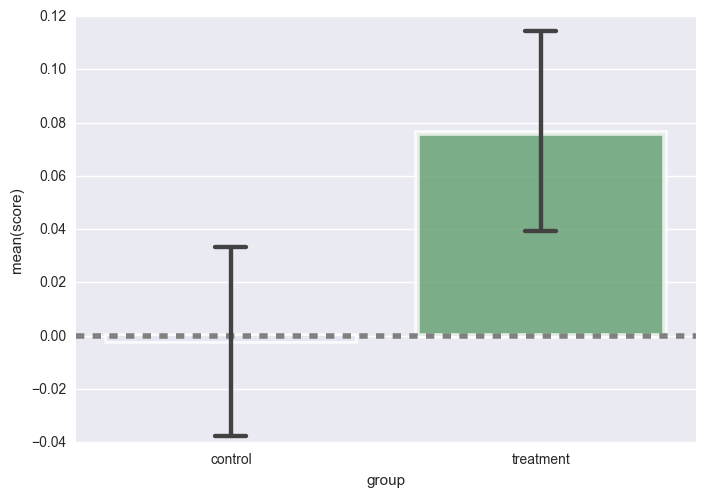

In [4]:
sns.barplot(data=testData,x='group',y='score',ci=95,
            capsize=.1,linewidth=4,
            alpha=0.8,edgecolor='white');

utils.addAxisLine(plt.gca())

With overwhelming likelihood, the two bars overlap a small amount. Does this mean that the chance that the means are different is more than 95%? Hint: if you didn't read the *Points of Significance* article on error bars, you should!

## Standard Error of the Mean Error Bars

Another common error bar is the "standard error of the mean" error bar. What kind of uncertainty does this error bar indicate, and when is it the appropriate error bar to plot?

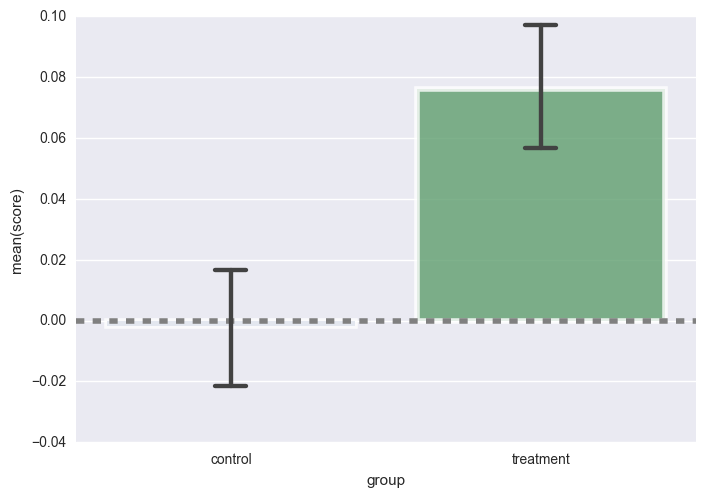

In [5]:
sns.barplot(data=testData,x='group',y='score',ci=68,
            capsize=.1,linewidth=4,alpha=0.8,edgecolor='white');

utils.addAxisLine(plt.gca())

## Standard Deviation Error Bars

Lastly, we have a rather uncommon error bar, the "standard deviation of the data" error bar. How is it related to the "standard error of the mean" bar? What happens to each as the number of datapoints collected gets larger?

*Side Note*: this kind of error bar is uncommon enough that seaborn doesn't have a built-in way to plot it. Check out the challenge question at the end of this lab if you want to learn more, and look inside the file `utils/lab02utils.py` to see how the function `plotSDbars` works.

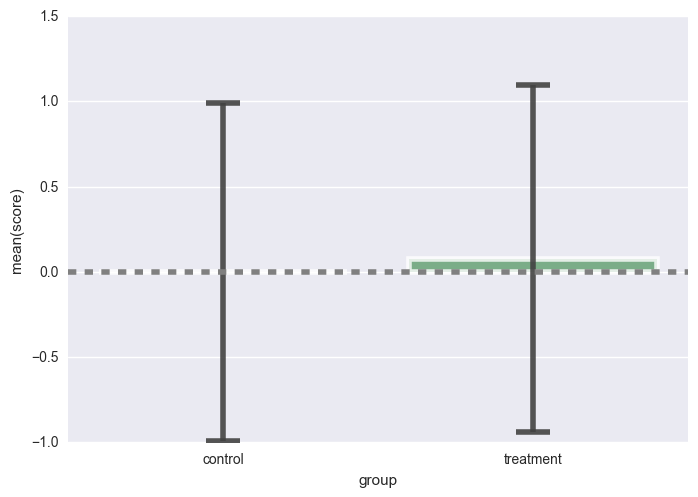

In [6]:
sns.barplot(data=testData,x='group',y='score',ci=None,capsize=.1,
           linewidth=4,alpha=0.8,edgecolor='white');

utils.plotSDbars(testData)

utils.addAxisLine(plt.gca())

Some people would consider the two distributions, of the control group scores and the treatment group scores, to be quite similar. Which error bar or bars capture this intuition? Others might consider them to be quite different. Which error bar or bars capture this intuition, and why?

Relatedly, let's consider the use of these error bars in decision-making. Let's say our "treatment" was a lifestyle change, like cutting a particular food out of your diet, and our "score" was a measure of overall mortality -- higher values meaning higher risk of death. Which error bars would a nation's public health official use to decide whether to recommend that the citizens cut that food from their diet? Which error bars might an informed citizen use to decide how important heeding that recommendation is? Can you explain the difference?

Hint: imagine I give you one datapoint, which I took from one of the two distributions. Will it be easy to tell which distribution it came from? What about if I gave you one hundred million datapoints, all from the same distribution?

** Challenge Question**: 

Seaborn plots error bars using a method called *bootstrapping*. Check out the optional reading, *Bootstrapping Confidence Intervals*, to learn more. What do we need in order to be able to use bootstrapping methods on our data?

In fact, all of the error bars plotted by seaborn are confidence intervals, with the confidence level determined by the keyword argument `ci`. In addition to making it possible to easily plot the confidence interval error bars, this also makes it possible to easily plot the standard error of the mean for most datasets, using, as above, a `ci` of 68. Can you explain why?